In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
#Load the dataset
data = pd.read_csv("laptop_prices.csv")
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
# Data Preprocessing
drop_cols = ['Product']  
data = data.drop(columns=drop_cols, errors='ignore')

# Handle missing values
data = data.dropna()

In [ ]:
# Encode categorical columns
# -----------------------------
categorical_cols = ['Company', 'TypeName', 'OS', 'Screen', 'Touchscreen', 
                    'RetinaDisplay', 'CPU_company', 'CPU_model', 
                    'PrimaryStorageType', 'SecondaryStorageType',
                    'GPU_company', 'GPU_model']

# Create dictionary to store encoders
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le  




In [ ]:
# Print the first 100 rows for reference
data.head(
    100
)

,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1,4,13.3,8,8,1.37,1339.69,3,2560,1600,...,1,1,2.3,40,128,0,3,2,2,60
1,1,4,13.3,8,8,1.34,898.94,3,1440,900,...,0,1,1.8,40,128,0,0,2,2,53
2,7,3,15.6,8,4,1.86,575.00,1,1920,1080,...,0,1,2.5,46,256,0,3,2,2,55
3,1,4,15.4,16,8,1.83,2537.45,3,2880,1800,...,1,1,2.7,54,512,0,3,2,0,80
4,1,4,13.3,8,8,1.37,1803.60,3,2560,1600,...,1,1,3.1,40,256,0,3,2,2,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,13.3,8,5,1.50,847.00,1,1920,1080,...,0,1,1.6,53,256,0,3,2,2,109
96,4,3,15.6,8,2,2.20,599.90,1,1920,1080,...,0,1,2.7,62,1024,0,1,2,0,95
97,4,3,15.6,4,2,2.20,485.00,1,1920,1080,...,0,1,2.0,36,256,0,3,2,0,95
98,2,3,15.6,6,5,2.00,577.00,1,1920,1080,...,0,1,2.4,38,256,0,3,2,3,7


In [ ]:
# Convert 'Yes'/'No' columns to 1/0 which are object type
data['IPSpanel'] = data['IPSpanel'].map({'Yes': 1, 'No': 0}).astype(float)


In [ ]:
# Check for missing values
print(data.isnull().sum())

Company                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [ ]:
#Feature Selection
X = data.drop('Price_euros', axis=1)
y = data['Price_euros']

# Save feature names for later
feature_columns = X.columns.tolist()


Company                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [ ]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Check for missing values
print(X_train.isnull().sum())


Company                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [ ]:
# Convert 'Yes'/'No' columns to 1/0
yes_no_cols = ['Touchscreen', 'RetinaDisplay', 'IPSpanel']  # Add any other Yes/No columns
for col in yes_no_cols:
    X_train[col] = X_train[col].map({'Yes': 1, 'No': 0}).astype(float)

In [ ]:
# Check the data types
print(X_train.dtypes)

Company                   int64
TypeName                  int64
Inches                  float64
Ram                       int64
OS                        int64
Weight                  float64
Screen                    int64
ScreenW                   int64
ScreenH                   int64
Touchscreen               int64
IPSpanel                float64
RetinaDisplay             int64
CPU_company               int64
CPU_freq                float64
CPU_model                 int64
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType        int64
SecondaryStorageType      int64
GPU_company               int64
GPU_model                 int64
dtype: object


In [ ]:
# Train Model

model = LinearRegression()
model.fit(X_train, y_train)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#Evaluate

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 128666.7043735679
R-squared: 0.740768641705732


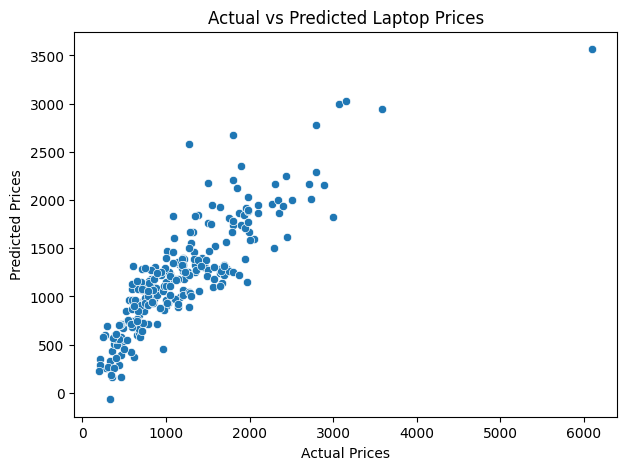

In [ ]:
# plot actual vs predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

Save Model, Encoders, and Feature Columns

In [58]:
#Save Model, Encoders, and Feature Columns
with open("laptop_price_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

print(" Model, encoders, and feature columns saved successfully!")

 Model, encoders, and feature columns saved successfully!


In [57]:

# Set style
sns.set_style("whitegrid")

# 1. Distribution of Laptop Prices
plt.figure(figsize=(8,5))
sns.histplot(data['Price_euros'], bins=30, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (€)")
plt.savefig("EDA_price_distribution.png")
plt.close()

# 2. Company vs Price
plt.figure(figsize=(10,6))
sns.boxplot(x='Company', y='Price_euros', data=data)
plt.xticks(rotation=45)
plt.title("Company vs Laptop Price")
plt.savefig("EDA_company_price.png")
plt.close()

# 3. OS vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='OS', y='Price_euros', data=data)
plt.title("OS vs Laptop Price")
plt.savefig("EDA_os_price.png")
plt.close()

# 4. RAM vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Ram', y='Price_euros', data=data)
plt.title("RAM vs Laptop Price")
plt.savefig("EDA_ram_price.png")
plt.close()

# 5. CPU Company vs Price
plt.figure(figsize=(6,5))
sns.boxplot(x='CPU_company', y='Price_euros', data=data)
plt.title("CPU Company vs Laptop Price")
plt.savefig("EDA_cpu_price.png")
plt.close()

# 6. GPU Company vs Price
plt.figure(figsize=(6,5))
sns.boxplot(x='GPU_company', y='Price_euros', data=data)
plt.title("GPU Company vs Laptop Price")
plt.savefig("EDA_gpu_price.png")
plt.close()

# 7. Actual vs Predicted Prices
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.savefig("model_actual_vs_predicted.png")
plt.close()
